# Exploratory Data Analysis of IPL Dataset

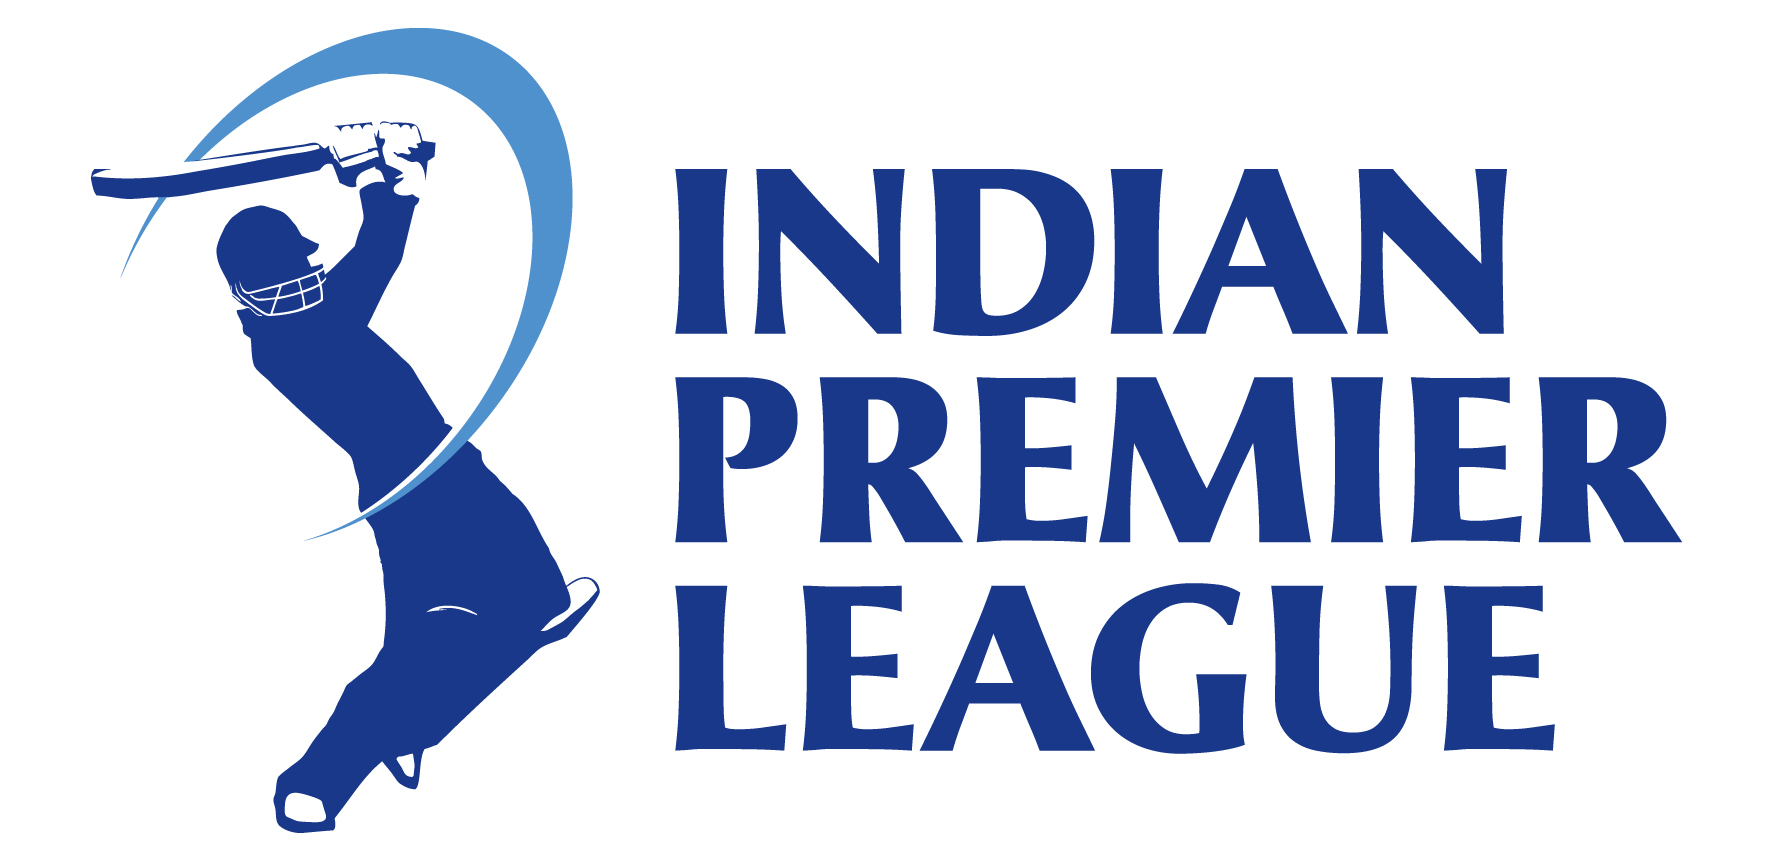


## By Rahul Sah
- EDA is one of the most important aspects of any Data Science project. It easily accounts for 60-70% of work before one goes on to modelling. 
- EDA is basically 'A first glance at the data'. In order to generate a good model from the dataset we first need to understand the data. EDA helps in achieving that. It summarizes data, finds patterns between data points and is often presented via visual methods (diagrams, graphs) for easy understandability.

Real world data is most of the times unstructured and dirty in nature. If we do not perform EDA first and directly feed this data into any machine learning algorithm, then we can be pretty sure that we would not get any desireable result. EDA helps in identifying gaps in the data and then filling those gaps appropriately.

The Objective of any EDA process is to analyse the underlying structure of a dataset which can help in insight generation.

In [115]:
# Important Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

### Libraries
- Pandas is the foundation library for data analysis and manipulation.
- NumPy is the fundamental package for scientific computing in Python
- Seaborn is a popular Python library for making statistical data.
- Sklearn provides tools for fitting models, preprocessing data, selecting and evaluating models, etc. It’s built on NumPy, SciPy, and matplotlib libraries.

##  Data Preparation and Cleaning

Reading IPL Dataset (.csv format) using pandas DataFrames.

In [116]:
ipl_df=pd.read_csv(r'C:\Users\ASUS\OneDrive\Desktop\Dataset\Indian Premier League\matches.csv')
ipl_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


- Getting Insight of Dataset using .describe()

In [117]:
ipl_df.set_index('id',inplace=True)

In [118]:
ipl_df.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Delhi Capitals','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

### Important
- Delhi Daredevils and Delhi Capitals are considered as a same team and replaced by DD
- Rising Pune Supergiant is 2 times in the dataset one with the name Rising Pune Supergiant and the other as Rising Pune Supergiants, we replaced both with RPS

In [119]:
ipl_df.describe()

,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,2013.444444,0.025132,13.283069,3.350529
std,3.366895,0.156630,23.471144,3.387963
min,2008.000000,0.000000,0.000000,0.000000
25%,2011.000000,0.000000,0.000000,0.000000
50%,2013.000000,0.000000,0.000000,4.000000
75%,2016.000000,0.000000,19.000000,6.000000
max,2019.000000,1.000000,146.000000,10.000000


# Points
- The matches.csv file has data of IPL matches starting from the season 2008 to 2019.
- Biggest margin of victory for the team batting first is 146 runs.
- Biggest victory of the team batting second is by 10 wickets.
- 75% of the victorious teams that bat first won by a margin of 19 runs.
- 75% of the victorious teams that bat second won by a margin of 6 wickets.
- There were 756 IPL matches hosted from 2008 to 2019.

In [120]:
ipl_df.columns

Index(['season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

### Observations
The Dataset has 18 Columns
- id: The IPL match id.
- season: The IPL season
- city: The city where the IPL match was held.
- date: The date on which the match was held.
- team1: One of the teams of the IPL match
- team2: The other team of the IPL match
- toss_winner: The team that won the toss
- toss_decision: The decision taken by the team that won the toss to ‘bat’ or ‘field’
- result: The result(‘normal’, ‘tie’, ‘no result’) of the match.
- dl_applied: (1 or 0)indicates whether the Duckworth-Lewis rule was applied or not.
- winner: The winner of the match.
- win_by_runs: Provides the runs by which the team batting first won
- win_by_wickets: Provides the number of wickets by which the team batting second won.
- player_of_match: The outstanding player of the match.
- venue: The venue where the match was hosted.
- umpire1: One of the two on-field umpires who officiate the match.
- umpire2: One of the two on-field umpires who officiate the match.
- umpire3: The off-field umpire who officiates the match

In [121]:
ipl_df.isnull().sum()

season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

- Here ,we have NaN value count for above columns in the dataset.Here 'umpire3' column has 637 NaN Values .As the off-field umpire parameter is insignificant, we can drop this column.

In [122]:
#ipl_df=ipl_df.drop(columns=['umpire3'],axis=1) 

In [123]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.color_palette("Paired")
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Analysing Teams won as per Season

In [124]:
matches_won_per_season=ipl_df.groupby('season')['winner'].value_counts()
matches_won_per_season

season  winner
2008    RR        13
        KXIP      10
        CSK        9
        DD         7
        MI         7
                  ..
2019    KKR        6
        KXIP       6
        SRH        6
        RCB        5
        RR         5
Name: winner, Length: 100, dtype: int64

In [125]:
year = 2008 #starting IPL season
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'matches_won'])
for items in matches_won_per_season.iteritems():    
    if items[0][0]==year:
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'matches_won': [items[1]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1   
print(win_per_season_df)

   year  team matches_won
0  2008    RR          13
0  2009    DD          10
0  2010    MI          11
0  2011   CSK          11
0  2012   KKR          12
0  2013    MI          13
0  2014  KXIP          12
0  2015   CSK          10
0  2016   SRH          11
0  2017    MI          12
0  2018   CSK          11
0  2019    MI          11


- From above we can see season wise most number of matches of won by teams

In [126]:
#win_per_season_df.reset_index()
#win_per_season_df.drop(columns=['index'],axis=1)

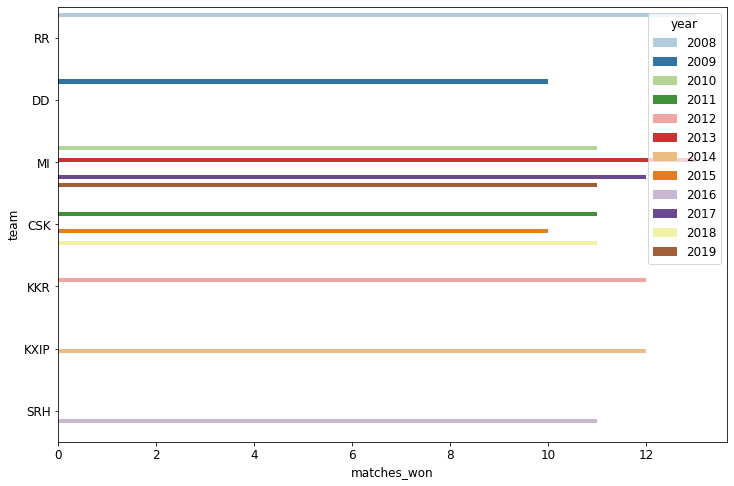

In [127]:
sns.barplot('matches_won', 'team', hue='year', data=win_per_season_df, palette='Paired');

In [128]:
venue_matches_count= ipl_df['venue'].value_counts()
print(venue_matches_count)

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

### Observation
From above we can see that Eden Garden is the most played IPL cricket ground
- Eden Gardens has hosted the maximum number of IPL matches followed by Wankhede Stadium and M Chinnaswamy Stadium.
- Till 2019, IPL matches were hosted by 41 venues.

In [129]:
venue_df=pd.DataFrame(columns=['venue', 'matches won'])
for items in venue_matches_count.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches won':[items[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)

### Data Visualtion using barplot

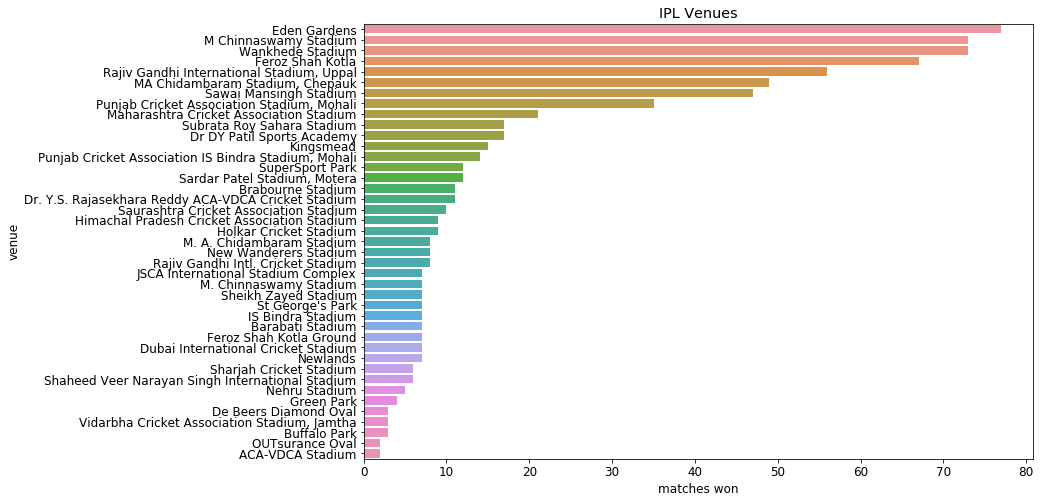

In [130]:
plt.title("IPL Venues")
sns.barplot(x='matches won', y='venue', data=venue_df);

In [131]:
team_wins= ipl_df['winner'].value_counts()

team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in team_wins.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)

In [132]:
team_wins_df

,team,wins
0,MI,109
1,CSK,100
2,KKR,92
3,RCB,84
4,KXIP,82
5,DD,77
6,RR,75
7,SRH,58
8,DC,29
9,RPS,15


## Observations
- Mumbai Indians is the most successful team with most number of wins(109 matches) till season 12.
- Chennai Super Kings is second most successful team in IPL with number of wins (100).

In [133]:
mvp_series = ipl_df['player_of_match'].value_counts()

mvp_player_df = pd.DataFrame(columns=["player", "wins"])
count = 0
'''sum=0
for items in mvp_series.iteritems():
    print(items)
    sum+=items[1]'''
#print("Total Matches : {}".format(sum)) #752 + 4 NaN values
#print(ipl_df['player_of_match'].isnull().sum())
for items in mvp_series.iteritems():
    if count>9:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        mvp_player_df = mvp_player_df.append(temp_df2, ignore_index=True)
        count += 1    

In [134]:
mvp_player_df

,player,wins
0,CH Gayle,21
1,AB de Villiers,20
2,DA Warner,17
3,MS Dhoni,17
4,RG Sharma,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


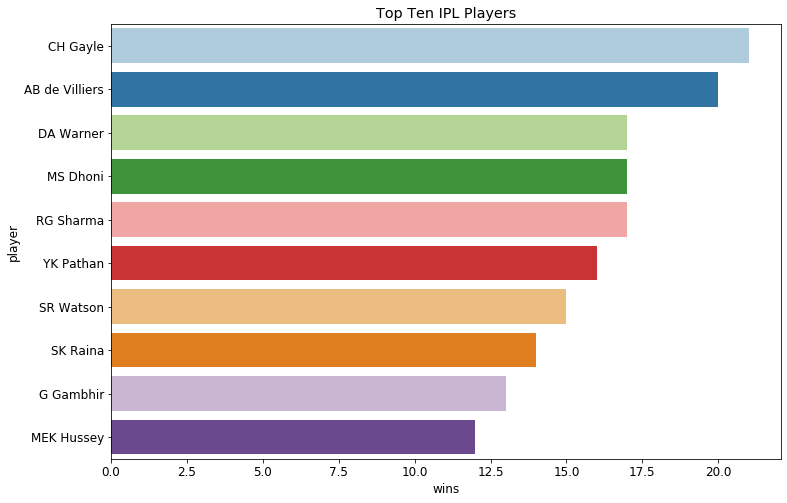

In [135]:
plt.title("Top Ten IPL Players")
sns.barplot(x='wins', y='player', data=mvp_player_df, palette='Paired');

## Observation
- Cris Gayle is the player who won the most player of the match awards and hence is the most valuable player.
- Six Indian players have figured in the top ten IPL players list.

In [136]:
toss_series = ipl_df['toss_winner'].value_counts()

toss_df = pd.DataFrame(columns=["team", "wins"])

for items in toss_series.iteritems():
    temp_df3 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_df = toss_df.append(temp_df3, ignore_index=True) 

In [137]:
toss_df

,team,wins
0,MI,98
1,KKR,92
2,DD,90
3,CSK,89
4,RCB,81
5,KXIP,81
6,RR,80
7,SRH,46
8,DC,43
9,PW,20


## Observation
- Mumbai Indians has won the most toss(till 2019) in IPL history.
- All the top teams in IPL are successful in winning the toss as well

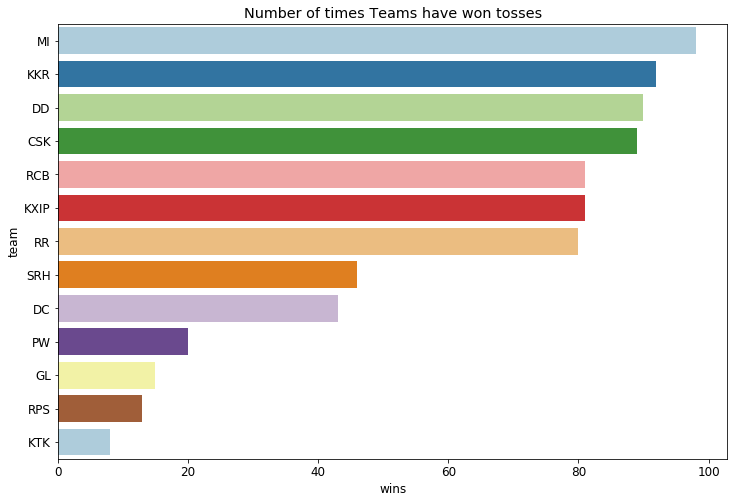

In [138]:
plt.title("Number of times Teams have won tosses")
sns.barplot(x='wins', y='team', data=toss_df, palette='Paired');

In [139]:
umpire1_count= ipl_df['umpire1'].value_counts()
umpire2_count= ipl_df['umpire2'].value_counts()

In [140]:
umpires_df = pd.concat([umpire1_count, umpire2_count], axis=1,sort=False)
umpires_df

,umpire1,umpire2
HDPK Dharmasena,73.0,14.0
Asad Rauf,51.0,NaN
S Ravi,49.0,57.0
AK Chaudhary,43.0,15.0
Aleem Dar,38.0,NaN
...,...,...
K Srinivasan,NaN,3.0
KN Anantapadmanabhan,NaN,3.0
SD Ranade,NaN,2.0
Subroto Das,NaN,1.0


In [141]:
umpire_ser = umpires_df.sum(axis=1)

umpire_df = pd.DataFrame(columns=["umpire", "matches"])

for items in umpire_ser.iteritems():
    temp_df4 = pd.DataFrame({
        'umpire':[items[0]],
        'matches':[items[1]]
    })
    umpire_df= umpire_df.append(temp_df4, ignore_index=True) 

In [142]:
umpire_df.sort_values('matches', ascending=False).head()

,umpire,matches
2,S Ravi,106.0
0,HDPK Dharmasena,87.0
11,C Shamshuddin,73.0
3,AK Chaudhary,58.0
56,SJA Taufel,55.0


### Observations
- S Ravi tops the umpire List in umpiring most number of matches (106) and most successful Indian Umpire in IPL History followed by Dharamasena

# Data Preparation and Cleaning

- Now , in this part we are going to study deliveries Dataset and findout the underlying

In [143]:
del_df=pd.read_csv(r'C:\Users\ASUS\OneDrive\Desktop\Dataset\Indian Premier League\deliveries.csv')

In [144]:
del_df.set_index('match_id',inplace=True)

In [145]:
del_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 1 to 11415
Data columns (total 20 columns):
inning              179078 non-null int64
batting_team        179078 non-null object
bowling_team        179078 non-null object
over                179078 non-null int64
ball                179078 non-null int64
batsman             179078 non-null object
non_striker         179078 non-null object
bowler              179078 non-null object
is_super_over       179078 non-null int64
wide_runs           179078 non-null int64
bye_runs            179078 non-null int64
legbye_runs         179078 non-null int64
noball_runs         179078 non-null int64
penalty_runs        179078 non-null int64
batsman_runs        179078 non-null int64
extra_runs          179078 non-null int64
total_runs          179078 non-null int64
player_dismissed    8834 non-null object
dismissal_kind      8834 non-null object
fielder             6448 non-null object
dtypes: int64(12), object(8)
memory usage: 28.7+

In [146]:
del_df.shape

(179078, 20)

In [147]:
del_df.isnull().sum()

inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [148]:
#del_df=del_df.drop(columns=['player_dismissed','dismissal_kind','fielder'],axis=1) 

In [149]:
del_df.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [150]:
del_df.shape

(179078, 20)

In [151]:
del_df.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Delhi Capitals','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

Below , we are merging season column in deliveries dataset so that we can easily analyise the dataset

In [152]:
deliveries_seasons = del_df.merge(ipl_df["season"], left_on=del_df.index, right_on=ipl_df.index)

In [153]:
deliveries_seasons.columns


Index(['key_0', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'season'],
      dtype='object')

In [154]:
overall_team_stats= pd.DataFrame(
{'Total Matches Played': ipl_df['team1'].value_counts() +ipl_df['team2'].value_counts(), 
'Toss Won': ipl_df['toss_winner'].value_counts(), 'Total Won': ipl_df['winner'].value_counts(), 
 'Total Lost': (ipl_df['team1'].value_counts() + ipl_df['team2'].value_counts()-ipl_df['winner'].value_counts())})
overall_team_stats.sort_values(by='Total Won', ascending=False)

,Total Matches Played,Toss Won,Total Won,Total Lost
MI,187,98,109,78
CSK,164,89,100,64
KKR,178,92,92,86
RCB,180,81,84,96
KXIP,176,81,82,94
DD,177,90,77,100
RR,147,80,75,72
SRH,108,46,58,50
DC,75,43,29,46
RPS,30,13,15,15


## Observations

- Mumbai Indians(MI) have won most number of matches(109) followed by Chennai Super King (CSK).

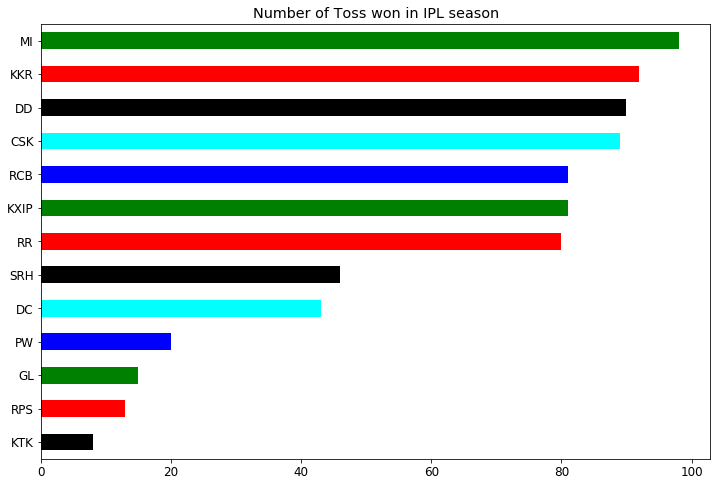

In [155]:
overall_team_stats["Toss Won"].sort_values().plot.barh(title="Number of Toss won in IPL season", figsize=(12,8),color=['black', 'red', 'green', 'blue', 'cyan'])



In [156]:
overall_team_stats['Win Ratio'] = overall_team_stats['Total Won'] * 100 / overall_team_stats['Total Matches Played']
overall_team_stats['Loss Ratio'] = overall_team_stats['Total Lost'] * 100 / overall_team_stats['Total Matches Played']
overall_team_stats.round(2).sort_values(by='Win Ratio', ascending = False)

,Total Matches Played,Toss Won,Total Won,Total Lost,Win Ratio,Loss Ratio
CSK,164,89,100,64,60.98,39.02
MI,187,98,109,78,58.29,41.71
SRH,108,46,58,50,53.70,46.30
KKR,178,92,92,86,51.69,48.31
RR,147,80,75,72,51.02,48.98
RPS,30,13,15,15,50.00,50.00
RCB,180,81,84,96,46.67,53.33
KXIP,176,81,82,94,46.59,53.41
DD,177,90,77,100,43.50,56.50
GL,30,15,13,17,43.33,56.67


## Observation

- CSK is the most successful team in terms of winning matches of IPL with win ratio 60.98% followed by MI with 58.29%.

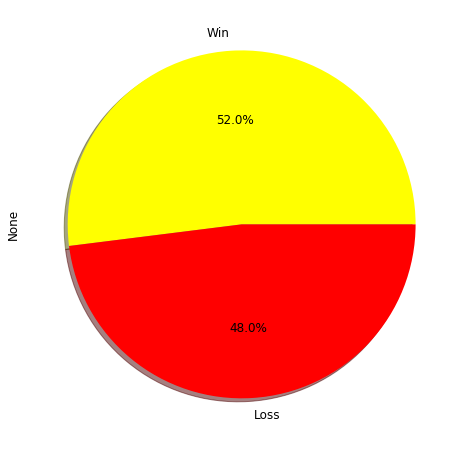

In [157]:
wins =ipl_df['toss_winner']==ipl_df['winner']
x=wins.value_counts().plot(kind='pie',colors=['yellow','red'],labels=['Win','Loss'],autopct='%1.1f%%', shadow=True)

In [158]:
# toss and match wins by toss_winner
toss_winner_as_winner=ipl_df[ipl_df['winner'] ==ipl_df['toss_winner']].groupby(['toss_winner'])['winner'].count()
# total toss wins by toss_winner
total_toss_winner = ipl_df.groupby(['toss_winner'])['winner'].count()
win_per_on_toss_win = toss_winner_as_winner / total_toss_winner * 100
win_per_on_toss_win = win_per_on_toss_win.to_frame()
win_per_on_toss_win['lost_per_on_toss_win'] = 100-win_per_on_toss_win['winner']
win_per_on_toss_win.rename(columns={'winner': 'win_per_on_toss_win'}, inplace=True)
win_per_on_toss_win.round(2).sort_values(by='win_per_on_toss_win', ascending=False)

,win_per_on_toss_win,lost_per_on_toss_win
toss_winner,,
GL,66.67,33.33
CSK,64.04,35.96
RPS,61.54,38.46
KKR,57.61,42.39
MI,57.14,42.86
RR,53.85,46.15
RCB,51.25,48.75
KTK,50.00,50.00
SRH,50.00,50.00


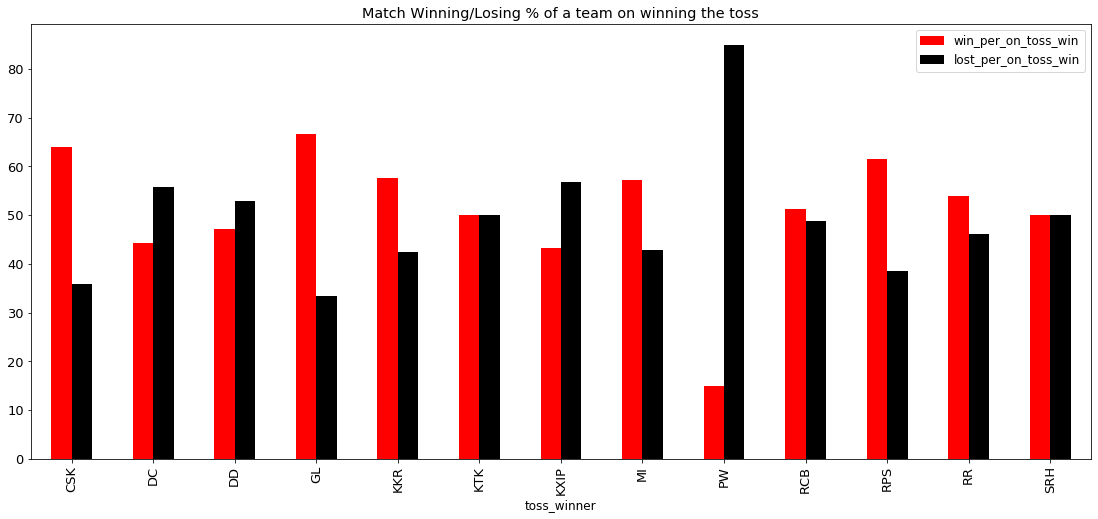

In [159]:
win_per_on_toss_win.plot.bar(figsize=(19,8),colors=['red','black'],title='Match Winning/Losing % of a team on winning the toss',fontsize=13,
 cmap='viridis')

In [160]:
import statistics as stats
stats.mode(ipl_df['venue'][ipl_df['win_by_runs']!=0])

'Wankhede Stadium'

- Wankhede Stadium has the record of most number of wins by run on this ground.

In [161]:
stats.mode(ipl_df['venue'][ipl_df['win_by_wickets']!=0])

'Eden Gardens'

- Eden Gardens has the record of most number of wins by wickets on this ground.

In [162]:
stats.mode(ipl_df['winner'][ipl_df['win_by_wickets']!=0])

'KKR'

- Kolkata Knight Riders is the best team in chasing

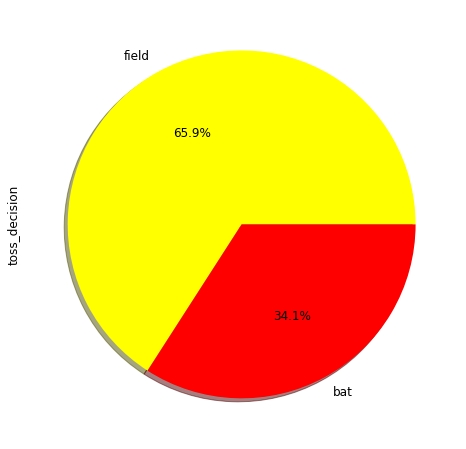

In [163]:
wins =ipl_df['toss_decision'][ipl_df['toss_winner']==ipl_df['winner']]
wins.value_counts().plot(kind='pie',colors=['yellow','red'],autopct='%1.1f%%', shadow=True)

From the above chart, we can say that choosing fielding first by winning toss helped in winning the match as well.

## Average runs scored in powerplay by each team per season

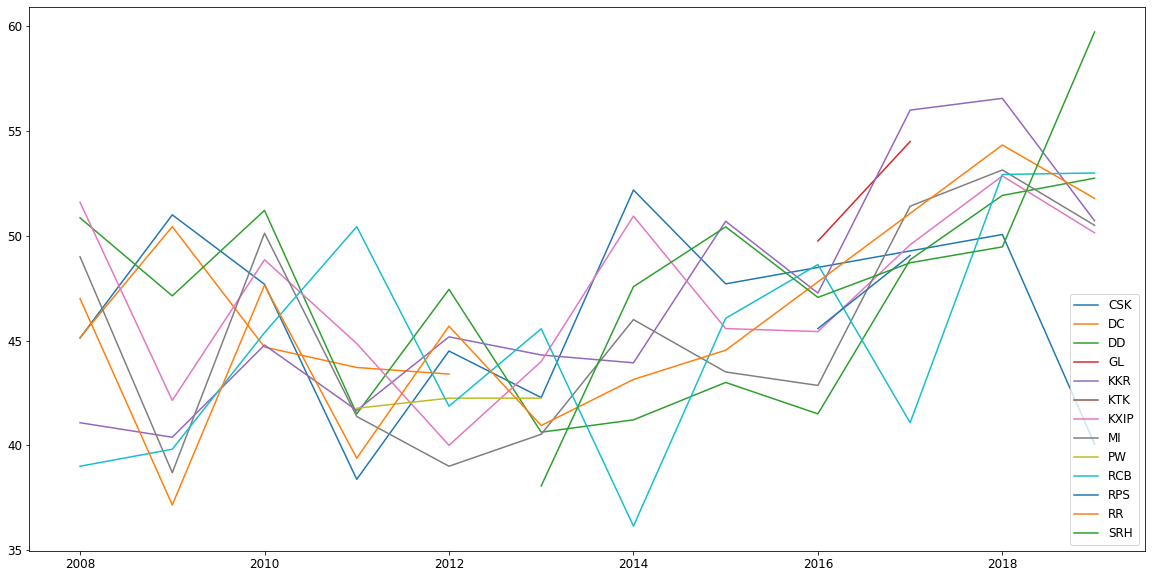

In [164]:
teams= np.sort(ipl_df['team1'].unique())
plt.figure(figsize=(20,10))
for key, team in enumerate(teams):
    run_in_powerplay_per_match_per_season =deliveries_seasons[(deliveries_seasons['batting_team'] == team) &(deliveries_seasons['over'] <= 6)].groupby(['key_0', 'season'])['total_runs'].sum().to_frame() 
    a = run_in_powerplay_per_match_per_season.groupby(['season'])['total_runs'].mean() 
    plt.plot(list(a.index), a, label = team)
plt.legend()
plt.show()

## Average wickets taken by a team in powerplay by per season

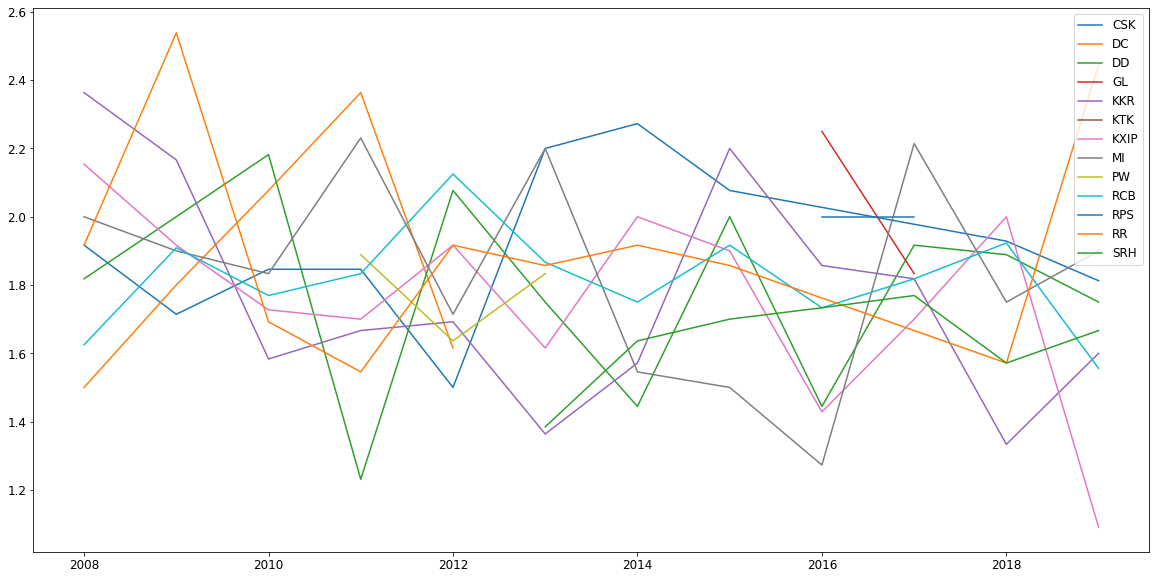

In [165]:
teams = np.sort(ipl_df['team1'].unique())
plt.figure(figsize=(20,10))
for key, team in enumerate(teams): 
    wicket_in_powerplay_per_match_per_season =deliveries_seasons[(deliveries_seasons['bowling_team'] == team) & (deliveries_seasons['over'] <= 6) & (deliveries_seasons['player_dismissed'].notnull())].groupby(['key_0', 'season'])['season'].count() 
    a = wicket_in_powerplay_per_match_per_season.groupby(['season']).mean() 
    plt.plot(list(a.index), a, label = team)
plt.legend()
plt.show()

## Most successful in super overs

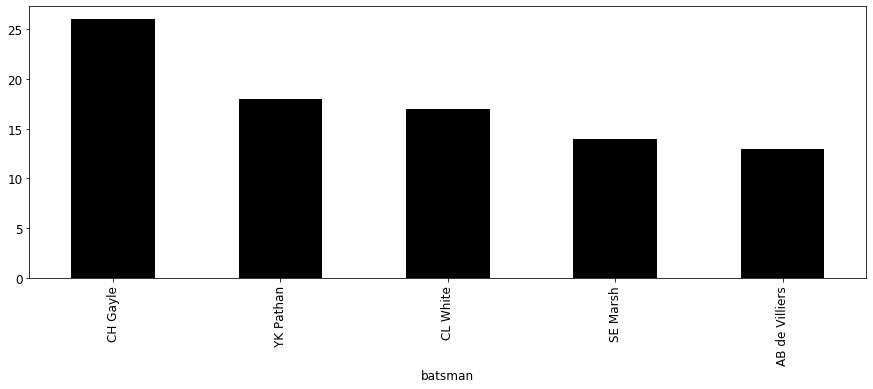

In [166]:
super_overs = del_df[del_df['is_super_over'] == 1].groupby('batsman')['total_runs'].sum().sort_values(ascending = False).head()
super_overs.plot(kind='bar',colors='black', figsize=(15, 5))


##  Observation

- Chris Gayle is most destructive batsman in Super Over and scored maximum run.

## Most successful in super overs in terms of wickets

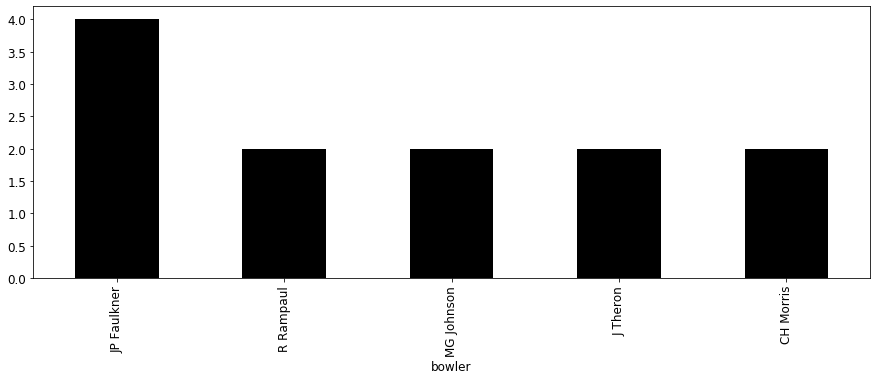

In [167]:
super_overs = del_df[(del_df['is_super_over'] == 1) & (del_df['player_dismissed'].notnull())].groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head()
super_overs.plot(kind='bar',colors='black', figsize=(15, 5))


## Observations

- JP Faulkner is most difficult bowler to face in Super Over.

## Orange Cap Winner Per Season

In [168]:
orange_cap_players =deliveries_seasons.groupby(['season']).apply(lambda x: (x.groupby(['batsman']).sum().sort_values('batsman_runs', ascending=False)).head(1))
orange_cap_players['batsman_runs'].to_frame()

,,batsman_runs
season,batsman,
2008,SE Marsh,616
2009,ML Hayden,572
2010,SR Tendulkar,618
2011,CH Gayle,608
2012,CH Gayle,733
2013,MEK Hussey,733
2014,RV Uthappa,660
2015,DA Warner,562
2016,V Kohli,973


## Purple Cap Winner Per Season

In [169]:
orange_cap_players =deliveries_seasons[deliveries_seasons['player_dismissed'].notnull()].groupby(['season']).apply(lambda x: (x.groupby(['bowler']).count().sort_values('player_dismissed', ascending=False)).head(1))
orange_cap_players['player_dismissed'].to_frame()

,,player_dismissed
season,bowler,
2008,Sohail Tanvir,24
2009,RP Singh,26
2010,PP Ojha,22
2011,SL Malinga,30
2012,M Morkel,30
2013,DJ Bravo,34
2014,MM Sharma,26
2015,DJ Bravo,28
2016,B Kumar,24


## Players with most 4s and 6s

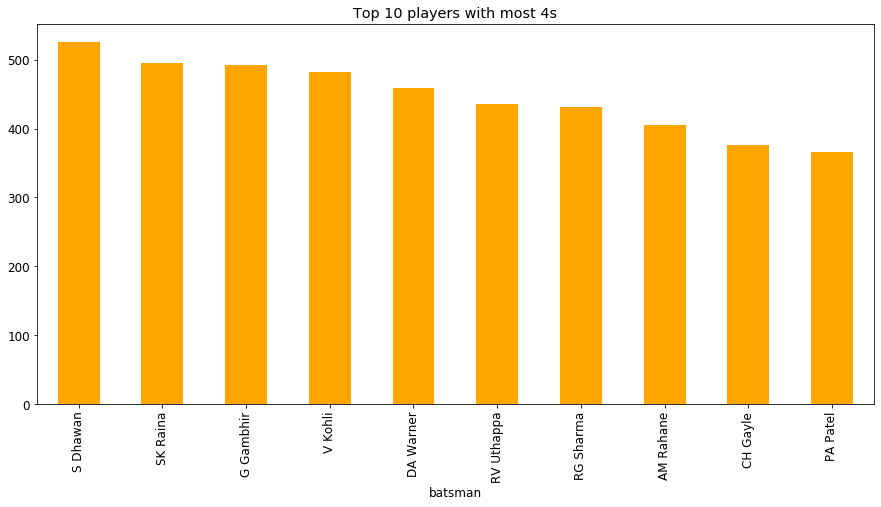

In [170]:
del_df[del_df['batsman_runs'] == 4].groupby('batsman')['batsman_runs'].count().sort_values(ascending = False).head(10).plot(kind='bar', title='Top 10 players with most 4s', figsize=(15,7), color='orange')

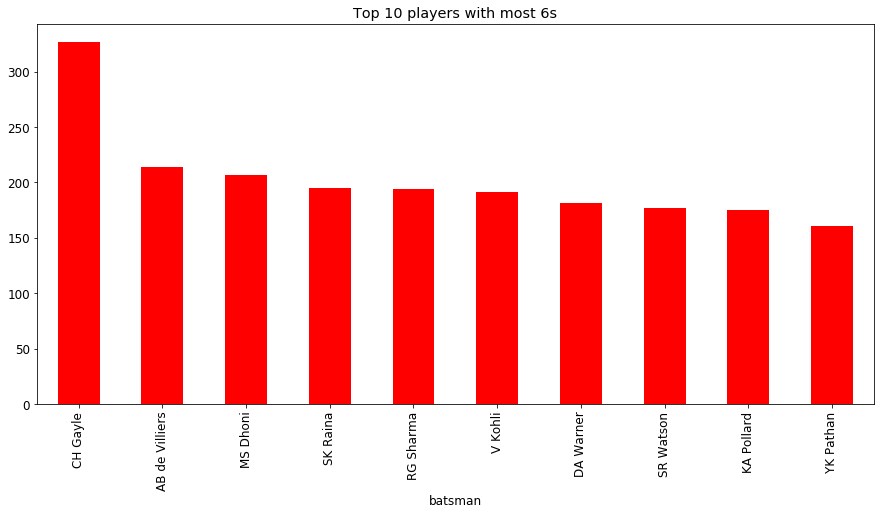

In [171]:
del_df[del_df['batsman_runs'] == 6].groupby('batsman')['batsman_runs'].count().sort_values(ascending = False).head(10).plot(kind='bar', title='Top 10 players with most 6s', figsize=(15,7), color='Red')

## Observations
- Chirs Gayle Holds the record of most number of sixes in IPL history.
- Sikhar Dhawan Holds the record of most number of fours in IPL history.


## Conclusion:

Different factors affects on the team winning  or lossing as we seen in the above examples and above-visualized data was accurate to the real world IPL statistics.
 
This is all about IPL Exploratory Data Analysis,the work is done as a part of a project while pursuing Internship at Graduate Rotational Internship Program (GRIP)
The Sparks Foundation.

THANK YOU
The Sparks Foundation

 